# We begin by importing the dataset into a pandas DataFrame. This will help us analyze and clean the data.

## 👀 View the top 5 rows of the before cleaning data

In [3]:
# Importing necessary library for data manipulation
import pandas as pd

# Loading the medical appointment dataset from the 'rawdata' folder
df = pd.read_csv("rawdata/KaggleV2-May-2016.csv")

# Displaying the first 5 rows of the dataset 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 🧠 Get DataFrame info (data types, non-null counts, memory usage)

In [5]:
# Displaying basic information about the dataset such as column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Checking for missing (null) values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Graphs Before Cleaning

C:\Users\DELL\AppData\Local\Temp\ipykernel_16424\663020806.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', ax=axes[0, 1], palette='pastel')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16424\663020806.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='No-show', ax=axes[1, 0], palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16424\663020806.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Handcap', ax=axes[1, 1], palette='coolwarm')


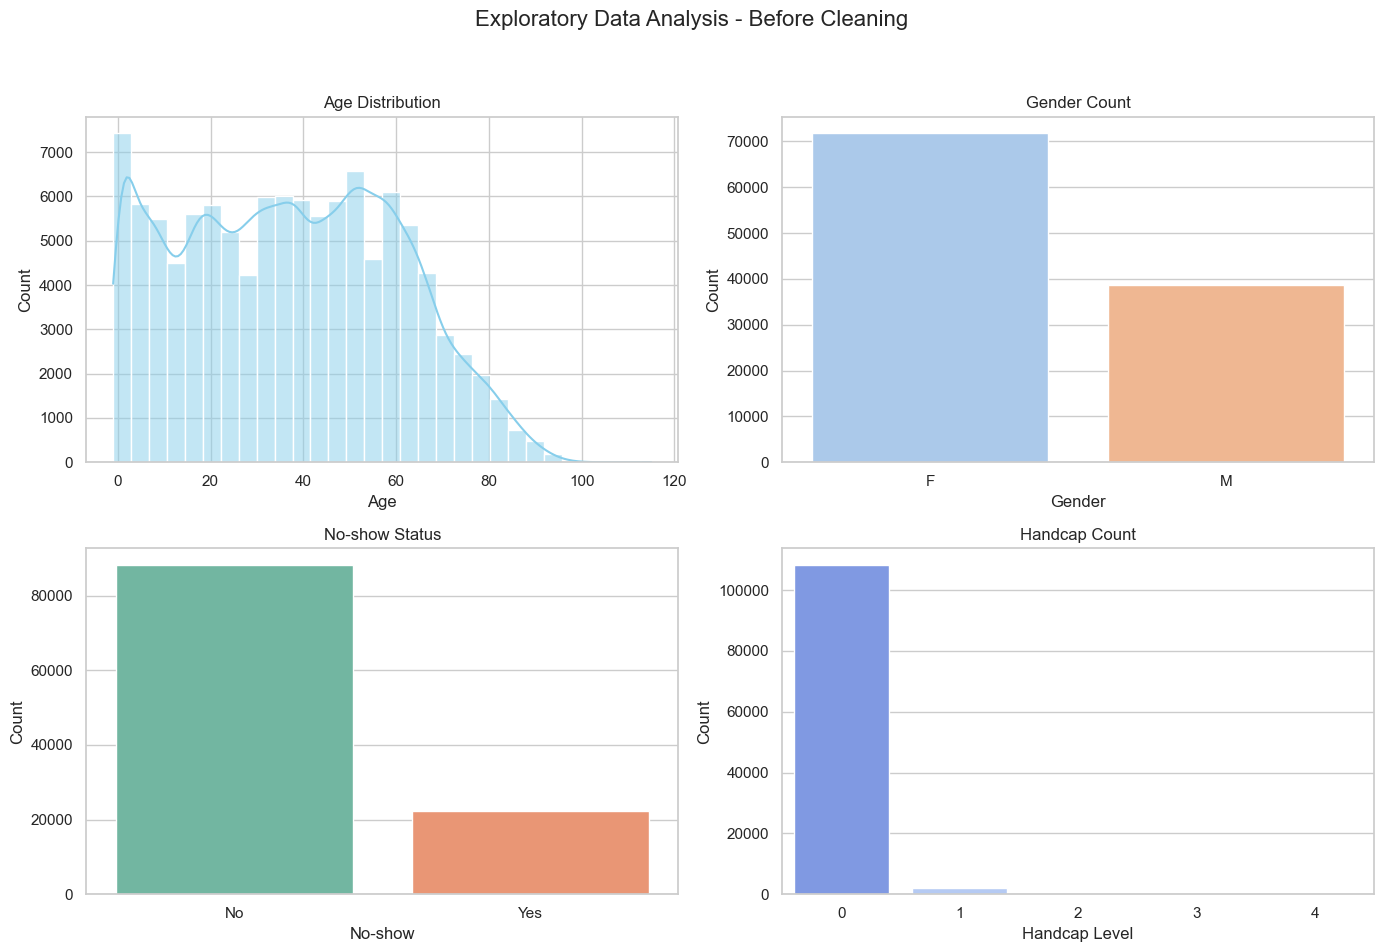

In [8]:
# importing libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Exploratory Data Analysis - Before Cleaning', fontsize=16)

# Plot 1: Age distribution
sns.histplot(df['Age'], kde=True, ax=axes[0, 0], bins=30, color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot 2: Gender Count
sns.countplot(data=df, x='Gender', ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Gender Count')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Plot 3: No-show count
sns.countplot(data=df, x='No-show', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('No-show Status')
axes[1, 0].set_xlabel('No-show')
axes[1, 0].set_ylabel('Count')

# Plot 4: Handicap count
sns.countplot(data=df, x='Handcap', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Handcap Count')
axes[1, 1].set_xlabel('Handcap Level')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


##  Check for Missing Values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


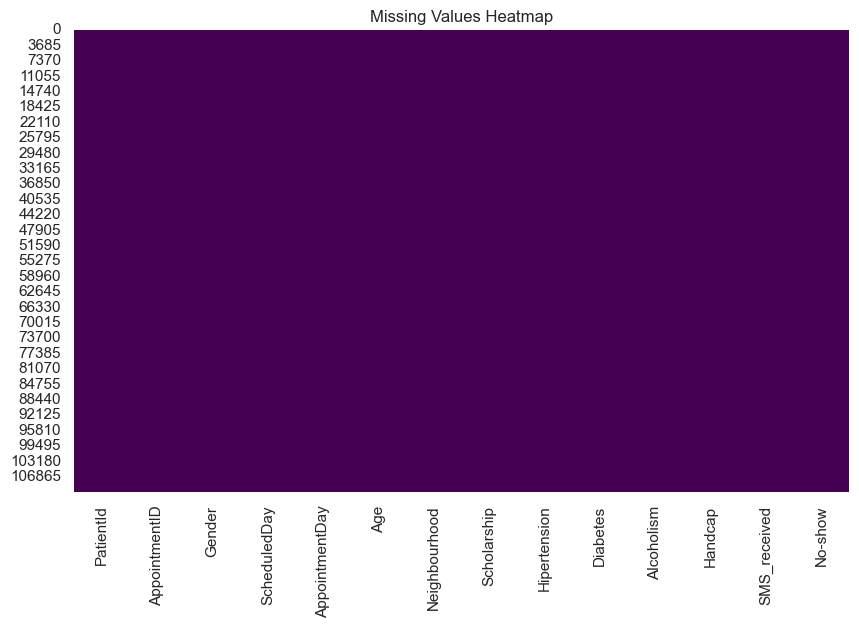

In [10]:
# Check for null values
print(df.isnull().sum())

# Optional: Visualize missing data (if any)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


## Check for Duplicates

In [11]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Total duplicate rows: {duplicates.sum()}")

# If any, drop them
df = df.drop_duplicates()


Total duplicate rows: 0


## Standardize Column Names

In [12]:
#Replace hyphens (-) and spaces with underscores (_)
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')
print(df.columns)

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')


In [13]:
df.rename(columns={
    'patientid': 'PatientID',
    'appointmentid': 'AppointmentID',
    'gender': 'Gender',
    'scheduledday': 'ScheduledDay',
    'appointmentday': 'AppointmentDay',
    'age': 'Age',
    'neighbourhood': 'Neighbourhood',
    'scholarship': 'Scholarship',
    'hipertension': 'Hypertension',
    'diabetes': 'Diabetes',
    'alcoholism': 'Alcoholism',
    'handcap': 'Handicap',
    'sms_received': 'SMS_Received',
    'no_show': 'No_Show'
}, inplace=True)


## Convert Dates to datetime Format

In [14]:
# Read original file again
df_raw = pd.read_csv("rawdata/KaggleV2-May-2016.csv")

# Show how it looked before datetime conversion
print("Before conversion:")
print(df_raw[['ScheduledDay', 'AppointmentDay']].head())
print(df_raw[['ScheduledDay', 'AppointmentDay']].dtypes)



Before conversion:
           ScheduledDay        AppointmentDay
0  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z
1  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z
2  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z
3  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z
4  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z
ScheduledDay      object
AppointmentDay    object
dtype: object


In [15]:
# Convert date columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [16]:
df[['ScheduledDay', 'AppointmentDay']].dtypes


ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

In [17]:
print("\nAfter conversion:")
print(df[['ScheduledDay', 'AppointmentDay']].head())
print(df[['ScheduledDay', 'AppointmentDay']].dtypes)


After conversion:
               ScheduledDay            AppointmentDay
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00
1 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00
2 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00
3 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00
4 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object


## Investigate 'Age' Column

In [18]:
# Check for invalid or strange age values
print("Age stats before cleaning:")
print(df['Age'].describe())

Age stats before cleaning:
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


In [19]:
# Find how many invalid ages (negative or above 120)
invalid_age = df[(df['Age'] < 0) | (df['Age'] > 120)]
print("\nInvalid age entries:")
print(invalid_age)
print(f"Number of invalid age entries: {invalid_age.shape[0]}")


Invalid age entries:
          PatientID  AppointmentID Gender              ScheduledDay  \
99832  4.659432e+14        5775010      F 2016-06-06 08:58:13+00:00   

                 AppointmentDay  Age Neighbourhood  Scholarship  Hypertension  \
99832 2016-06-06 00:00:00+00:00   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handicap  SMS_Received No_Show  
99832         0           0         0             0      No  
Number of invalid age entries: 1


In [20]:
# Drop rows with invalid age
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]

In [21]:
# Verify cleanup
print("\nAge stats after cleaning:")
print(df['Age'].describe())


Age stats after cleaning:
count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


## Clean and Standardize Gender Values

In [22]:
# Clean and standardize gender values
print("Unique values in 'Gender' before replacement:")
print(df['Gender'].unique())

Unique values in 'Gender' before replacement:
['F' 'M']


In [23]:
# Replace shorthand with full form
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [24]:
print("\nUnique values in 'Gender' after replacement:")
print(df['Gender'].unique())


Unique values in 'Gender' after replacement:
['Female' 'Male']


In [25]:
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,2.987250e+13,5642903,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Code to Check & Fix No_Show Column:

In [27]:
# Display current unique values
print("Unique values before cleaning:")
print(df['No_Show'].unique())

Unique values before cleaning:
['No' 'Yes']


In [28]:
# Clean values - strip whitespace, make uppercase first letter only
df['No_Show'] = df['No_Show'].str.strip().str.capitalize()

In [29]:
# Validate values - keep only expected options
valid_values = ['Yes', 'No']
df = df[df['No_Show'].isin(valid_values)]

In [30]:
# Replace 'No' with 'Showed Up', 'Yes' with 'Missed'
df['No_Show'] = df['No_Show'].replace({
    'No': 'Showed Up',
    'Yes': 'Missed'
})

# Display final unique values to verify
print("\nUnique values after replacement:")
print(df['No_Show'].unique())



Unique values after replacement:
['Showed Up' 'Missed']


## Convert Large Numeric ID Columns to String Format (e.g., PatientID, AppointmentID)

In [79]:
# Convert large number columns to string before saving
df['PatientID'] = df['PatientID'].astype(str)

# Or do this for multiple columns
cols_to_fix = ['PatientID', 'AppointmentID']  
df[cols_to_fix] = df[cols_to_fix].astype(str)


# 👀 1. View the top 5 rows of the cleaned data

In [32]:
print("Top 5 rows of the cleaned dataset:")
df.head()

Top 5 rows of the cleaned dataset:


,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,29872499824296.0,5642903,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed Up
1,558997776694438.0,5642503,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed Up
2,4262962299951.0,5642549,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Showed Up
3,867951213174.0,5642828,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed Up
4,8841186448183.0,5642494,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed Up


# 🧠 2. Get DataFrame info (data types, non-null counts, memory usage)

In [33]:
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110526 non-null  object             
 1   AppointmentID   110526 non-null  object             
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_Received    110526 non-null  int64              
 13  No

# 🚨 3. Check for Missing Values (Nulls)

In [34]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

PatientID         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hypertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handicap          0.0
SMS_Received      0.0
No_Show           0.0
dtype: float64


# 📈 4.Visualization After Cleanup

C:\Users\DELL\AppData\Local\Temp\ipykernel_16424\700374262.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Gender', ax=axes[0, 1], palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16424\700374262.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='No_Show', ax=axes[1, 0], palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16424\700374262.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Handicap', ax=axes[1, 1], palette='coolwarm')


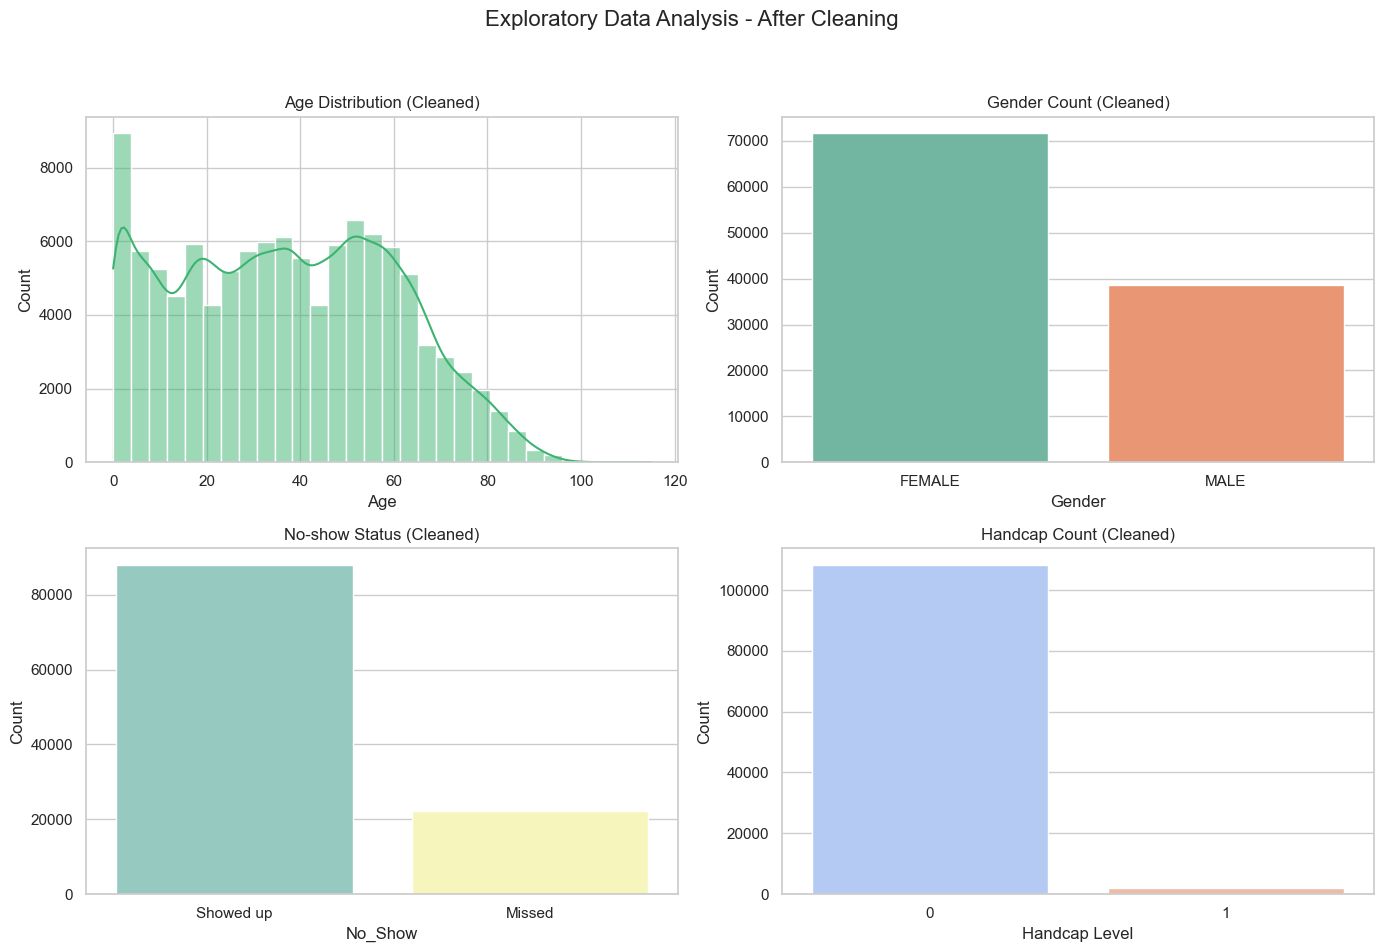

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Copy original DataFrame
df_clean = df.copy()

# Filter valid Age values
df_clean = df_clean[df_clean['Age'] >= 0]

# Standardize No_Show and Gender (convert to string before using .str)
df_clean['No_Show'] = df_clean['No_Show'].astype(str).str.strip().str.capitalize()
df_clean['Gender'] = df_clean['Gender'].astype(str).str.strip().str.upper()

# Keep only valid Handcap values (0 or 1)
df_clean = df_clean[df_clean['Handicap'].isin([0, 1])]

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Exploratory Data Analysis - After Cleaning', fontsize=16)

# Plot 1: Age Distribution
sns.histplot(df_clean['Age'], kde=True, ax=axes[0, 0], bins=30, color='mediumseagreen')
axes[0, 0].set_title('Age Distribution (Cleaned)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot 2: Gender Count
sns.countplot(data=df_clean, x='Gender', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Gender Count (Cleaned)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Plot 3: No-show Status
sns.countplot(data=df_clean, x='No_Show', ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('No-show Status (Cleaned)')
axes[1, 0].set_xlabel('No_Show')
axes[1, 0].set_ylabel('Count')

# Plot 4: Handicap Count
sns.countplot(data=df_clean, x='Handicap', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Handcap Count (Cleaned)')
axes[1, 1].set_xlabel('Handcap Level')
axes[1, 1].set_ylabel('Count')

# Layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Saving the clean data to csv

In [36]:
df_clean.to_csv('cleaned_dataset.csv', index=False)

print("cleaned_dataset.csv saved successfully!")

cleaned_dataset.csv saved successfully!
